## Develop CNN model to recognize minimum four different type of birds - Parrots, Eagles, Owls, Penguins and Peacocks. Train model to obtain accuracy >70%

### Bonus: Use image classification API service using trained model, use of pre-trained model such as VGG,ResNet,Inception in training image recognition model

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [22]:
#Prepare images from directory for training and validation for augmentation

batch_size = 32
img_height = 180
img_width = 180

# this is the augmentation configuration 
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
   rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration 
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of './dataset/flower_photos/training', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './images/dataset/training', 
        target_size=(180, 180),  
        batch_size=batch_size,
        class_mode='categorical')  # use categorical_crossentropy loss for multi-class


# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './images/dataset/validation',
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='categorical')

Found 2083 images belonging to 5 classes.
Found 482 images belonging to 5 classes.


### Generate class labels 

In [19]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'eagle', 1: 'owl', 2: 'parrot', 3: 'peacock', 4: 'penguin'}


### Define 2D CNN model

In [20]:
num_classes = 5

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(180, 180,3)))

model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

# Add dropout layer with 0.1

model.add(tf.keras.layers.Dropout(0.1))

# Flatten the layer and Dense layer with 128 neurons and softmax as activation function

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='softmax'))

# Add final densed layer with target number of classes

model.add(tf.keras.layers.Dense(num_classes))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 32)      

In [8]:
#Check for images in correct format before training model

import os
from PIL import Image
folder_path = './images/dataset/training'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        #print('** Path: {}  **'.format(file_path), end="/r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

** Path: ./images/dataset/training\eagle\eg (100).jpg  **/r** Path: ./images/dataset/training\eagle\eg (101).jpg  **/r** Path: ./images/dataset/training\eagle\eg (102).jpg  **/r** Path: ./images/dataset/training\eagle\eg (103).jpg  **/r** Path: ./images/dataset/training\eagle\eg (104).jpg  **/r** Path: ./images/dataset/training\eagle\eg (105).jpg  **/r** Path: ./images/dataset/training\eagle\eg (106).jpg  **/r** Path: ./images/dataset/training\eagle\eg (107).jpg  **/r** Path: ./images/dataset/training\eagle\eg (108).jpg  **/r** Path: ./images/dataset/training\eagle\eg (109).jpg  **/r** Path: ./images/dataset/training\eagle\eg (110).jpg  **/r** Path: ./images/dataset/training\eagle\eg (111).jpg  **/r** Path: ./images/dataset/training\eagle\eg (112).jpg  **/r** Path: ./images/dataset/training\eagle\eg (113).jpg  **/r** Path: ./images/dataset/training\eagle\eg (114).jpg  **/r** Path: ./images/dataset/training\eagle\eg (115).jpg  **/r** Path: ./images/dataset/training\eagle\eg (116).jpg  *

C:\Users\boogy\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


** Path: ./images/dataset/training\peacock\Image_257.png  **/r** Path: ./images/dataset/training\peacock\Image_258.jpg  **/r** Path: ./images/dataset/training\peacock\Image_259.JPG  **/r** Path: ./images/dataset/training\peacock\Image_260.jpg  **/r** Path: ./images/dataset/training\peacock\Image_261.jpg  **/r** Path: ./images/dataset/training\peacock\Image_262.jpg  **/r** Path: ./images/dataset/training\peacock\Image_263.jpg  **/r** Path: ./images/dataset/training\peacock\Image_264.jpg  **/r** Path: ./images/dataset/training\peacock\Image_265.jpg  **/r** Path: ./images/dataset/training\peacock\Image_266.jpg  **/r** Path: ./images/dataset/training\peacock\Image_267.jpg  **/r** Path: ./images/dataset/training\peacock\Image_268.jpg  **/r** Path: ./images/dataset/training\peacock\Image_269.jpg  **/r** Path: ./images/dataset/training\peacock\Image_270.jpg  **/r** Path: ./images/dataset/training\peacock\Image_271.jpg  **/r** Path: ./images/dataset/training\peacock\Image_272.jpg  **/r** Path:

In [9]:
#Check for images in correct format before training model

import os
from PIL import Image
folder_path = './images/dataset/validation'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="/r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

** Path: ./images/dataset/validation\eagle\eg (1).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (1).png  **/r** Path: ./images/dataset/validation\eagle\eg (10).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (10).png  **/r** Path: ./images/dataset/validation\eagle\eg (11).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (11).png  **/r** Path: ./images/dataset/validation\eagle\eg (12).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (12).png  **/r** Path: ./images/dataset/validation\eagle\eg (13).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (13).png  **/r** Path: ./images/dataset/validation\eagle\eg (14).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (14).png  **/r** Path: ./images/dataset/validation\eagle\eg (15).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (15).png  **/r** Path: ./images/dataset/validation\eagle\eg (16).jpg  **/r** Path: ./images/dataset/validation\eagle\eg (2).jpg  **/r** Path: ./images/dataset/validation\eagle\

### Compile and Train model

In [21]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
34/66 [==============>...............] - ETA: 42s - loss: 1.5913 - accuracy: 0.2635

C:\Users\boogy\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


66/66 [==============================] - ETA: 0s - loss: 1.5643 - accuracy: 0.3048WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000223809AFEA0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
66/66 [==============================] - 121s 2s/step - loss: 1.5643 - accuracy: 0.3048 - val_loss: 1.5152 - val_accuracy: 0.4253
Epoch 2/50
66

In [23]:
model.save('model.h5')

In [24]:
scores = model.evaluate(validation_generator, verbose=0)

print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 82.57%


## Plotting of graph for accuracy and loss

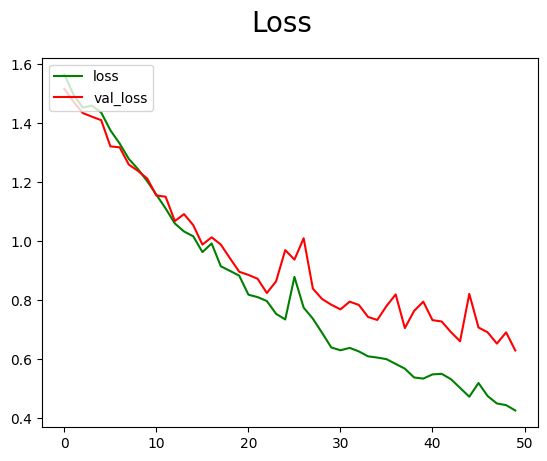

In [25]:
fig = plt.figure()
plt.plot(history.history['loss'], color='green', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

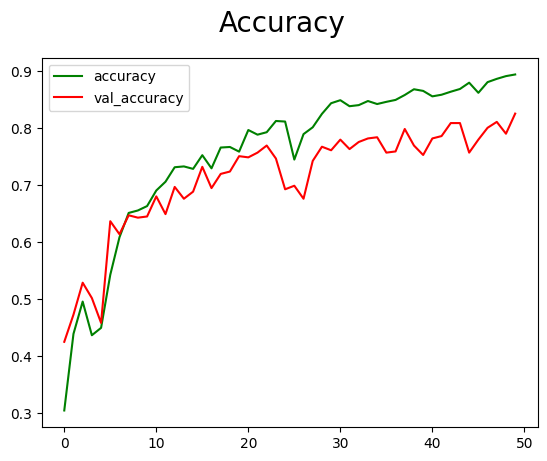

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Load the model

In [7]:
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:

model = models.Sequential()

model = models.load_model("./model.h5")

# The label that classifing

labels = {0: 'eagle', 1: 'owl', 2: 'parrot', 3: 'peacock', 4: 'penguin'}


## Classify image using trained model

In [9]:
testimage_path = "./images/dataset/test/owltest.jpg"

img =  tf.keras.preprocessing.image.load_img(testimage_path,target_size=(180,180))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

print(img_array.shape)

# predict using the image_array data

predictions = model.predict(img_array)

# compute probability back using softmax function 

score = tf.nn.softmax(predictions)

print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score)))

(1, 180, 180, 3)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 241ms/step
tf.Tensor([[0.07169776 0.83889997 0.02662953 0.03521566 0.02755705]], shape=(1, 5), dtype=float32)
This image most likely belongs to owl with a 83.89 percent confidence.


In [10]:
testimage_path = "./images/dataset/test/peacocktest.jpg"

img =  tf.keras.preprocessing.image.load_img(testimage_path,target_size=(180,180))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

print(img_array.shape)

# predict using the image_array data

predictions = model.predict(img_array)

# compute probability back using softmax function 

score = tf.nn.softmax(predictions)

print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score)))

(1, 180, 180, 3)
1/1 [==============================] - 0s 81ms/step
tf.Tensor([[0.02079686 0.0289961  0.05135965 0.8754578  0.02338952]], shape=(1, 5), dtype=float32)
This image most likely belongs to peacock with a 87.55 percent confidence.


In [7]:
testimage_path = "./images/dataset/test/penguintest.jpg"

img =  tf.keras.preprocessing.image.load_img(testimage_path,target_size=(180,180))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

print(img_array.shape)

# predict using the image_array data

predictions = model.predict(img_array)

# compute probability back using softmax function 

score = tf.nn.softmax(predictions)

print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score)))

(1, 180, 180, 3)
1/1 [==============================] - 0s 94ms/step
tf.Tensor([[0.03892267 0.03654111 0.01590839 0.02093745 0.88769037]], shape=(1, 5), dtype=float32)
This image most likely belongs to penguin with a 88.77 percent confidence.


In [8]:
testimage_path = "./images/dataset/test/eagletest.jpg"

img =  tf.keras.preprocessing.image.load_img(testimage_path,target_size=(180,180))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

print(img_array.shape)

# predict using the image_array data

predictions = model.predict(img_array)

# compute probability back using softmax function 

score = tf.nn.softmax(predictions)

print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score)))

(1, 180, 180, 3)
1/1 [==============================] - 0s 86ms/step
tf.Tensor([[0.8809162  0.03586889 0.02740531 0.02011831 0.03569123]], shape=(1, 5), dtype=float32)
This image most likely belongs to eagle with a 88.09 percent confidence.


In [31]:
testimage_path = "./images/dataset/test/parrottest.jpg"

img =  tf.keras.preprocessing.image.load_img(testimage_path,target_size=(180,180))

img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) 

print(img_array.shape)

# predict using the image_array data

predictions = model.predict(img_array)

# compute probability back using softmax function 

score = tf.nn.softmax(predictions)

print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score)))

(1, 180, 180, 3)
1/1 [==============================] - 0s 72ms/step
tf.Tensor([[0.0346943  0.02737493 0.85251814 0.06836773 0.01704489]], shape=(1, 5), dtype=float32)
This image most likely belongs to parrot with a 85.25 percent confidence.


In [24]:
# serialize model to json
json_model = model.to_json()

#save the model architecture to JSON file
with open('bird_model.json', 'w') as json_file:
    json_file.write(json_model)

In [25]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('bird_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [26]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(validation_generator, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
accuracy: 82.57%


## FLASK API Model Prediction

In [11]:
import io
import os
import sys 
import numpy as np
import tensorflow as tf
from PIL import Image
from flask import Flask, jsonify, request, render_template
import base64

In [ ]:
app = Flask(__name__, template_folder = "./template")

@app.route('/', methods=['GET'])
def index():
     return render_template('submit_image.html')

def loadmodel():    
    json_file = open('bird_model.json','r')
    loaded_model_json = json_file.read()
    json_file.close()
    
    #Load structure of model from json
    
    loaded_model = tf.keras.models.model_from_json(loaded_model_json)
    
    #Load weight from model.h5 file
    
    loaded_model.load_weights("model.h5")
    
    return loaded_model

def prepare_image(img):
    img = Image.open(io.BytesIO(img))
    #img = img.convert("L")
    img = img.resize((180, 180)) 
    img = np.array(img)
    
    
    img = img.reshape(180,180, 3)
    print(img.shape)
    
    #convert array image data into tensor shape
    
    img = np.expand_dims(img, 0)  
    
    return img

def predict_result(img):
    class_names = ["Eagle", "Owl", "Parrot", "Peacock", "Penguin"]
    
    #Call load model
    
    model = loadmodel()
    
    #Classify the image
    
    rpredict = model.predict(img)
    
    return class_names[np.argmax(rpredict[0])]


@app.route('/predict', methods=['POST'])
def classify_image():    
    if 'imagefile' not in request.files:
        return "Please try again. The Image doesn't exist"
    
    #Get the image file from request.files
    
    file = request.files.get('imagefile')

    if not file:
        return
    
    #Read image into bytes
    
    img_bytes = file.read()
    
    #Convert image bytes into base64 string
    
    img_string = base64.b64encode(img_bytes).decode()
    
    #Prepare image data
    
    img = prepare_image(img_bytes)
    
    #Classify the image data
    
    presult = predict_result(img)
    
    #Add the predicted result as parameter in render_template
    
    return render_template('submit_image.html', img_data=img_string, predict_data = presult), 200

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    app.debug = True    
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000
Press CTRL+C to quit
127.0.0.1 - - [10/Feb/2023 10:10:10] "GET / HTTP/1.1" 200 -


(180, 180, 3)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 271ms/step


127.0.0.1 - - [10/Feb/2023 10:10:22] "POST /predict HTTP/1.1" 200 -


(180, 180, 3)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 258ms/step


127.0.0.1 - - [10/Feb/2023 10:10:28] "POST /predict HTTP/1.1" 200 -
